Importe de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Carga de datos

In [25]:
Clasificacion = pd.read_excel('Data.xlsx',sheet_name='Datos')
Ventas_cerrado = pd.read_excel('Data.xlsx',sheet_name='Datos mes cerrados')
Ventas_semanales = pd.read_excel('Data.xlsx',sheet_name='Datos_mes_dia')

Exploración

In [63]:
def Descripcion_df(df):
    print('Forma del dataframe ' + str(df.shape))

    df.info()

    Codigos_Unicos =df.apply(lambda x: x['FECHA ASIGNADO']+x['CODIGO'],axis=1).unique().shape
    
    print('Filas unicas ' +str(Codigos_Unicos))

Descripcion_df(Clasificacion)

Forma del dataframe (3913, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   FECHA ASIGNADO  3913 non-null   object
 1   CODIGO          3913 non-null   object
 2   CATEGORIA       3913 non-null   object
 3   LINEA           3913 non-null   object
 4   CALIFICACION    3913 non-null   object
dtypes: object(5)
memory usage: 153.0+ KB
Filas unicas (3913,)


In [64]:
Descripcion_df(Ventas_cerrado)

Forma del dataframe (4165, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA ASIGNADO       4165 non-null   object 
 1   CODIGO               4165 non-null   object 
 2   CONTRIBUCION-2       4165 non-null   float64
 3   ORDENES DE PEDIDO-2  4165 non-null   float64
 4   UNIDADES VENDIDAS-2  4165 non-null   float64
 5   CONTRIBUCION-3       4165 non-null   float64
 6   ORDENES DE PEDIDO-3  4165 non-null   float64
 7   UNIDADES VENDIDAS-3  4165 non-null   float64
dtypes: float64(6), object(2)
memory usage: 260.4+ KB
Filas unicas (4165,)


In [67]:
Ventas_cerrado.head()

,FECHA ASIGNADO,CODIGO,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3
0,2023-11,X548,1.000000,1.000000,1.000000,0.709625,0.780037,0.573626
1,2023-11,X160,0.402240,0.330869,0.314286,0.316937,0.297597,0.217582
2,2023-11,X848,0.308432,0.402957,0.309890,0.178797,0.134935,0.114286
3,2023-11,X231,0.199239,0.319778,0.237363,0.200751,0.218115,0.184615
4,2023-11,X429,0.343280,0.253235,0.169231,0.275769,0.133087,0.118681


In [65]:
Descripcion_df(Ventas_semanales)

Forma del dataframe (16663, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16663 entries, 0 to 16662
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CODIGO             16663 non-null  object 
 1   FECHA              16663 non-null  object 
 2   FECHA ASIGNADO     16663 non-null  object 
 3   Semana de Fecha    16663 non-null  object 
 4   CONTRIBUCION       16663 non-null  float64
 5   ORDENES DE PEDIDO  16663 non-null  float64
 6   UNIDADES VENDIDAS  16663 non-null  float64
dtypes: float64(3), object(4)
memory usage: 911.4+ KB
Filas unicas (4674,)


In [68]:
Ventas_semanales.head()

,CODIGO,FECHA,FECHA ASIGNADO,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS
0,X548,2023-06,2023-07,Semana 23,0.145135,0.120148,0.057143
1,X548,2023-06,2023-07,Semana 24,0.277133,0.177449,0.224176
2,X548,2023-06,2023-07,Semana 25,0.158138,0.160813,0.072527
3,X548,2023-06,2023-07,Semana 26,0.246683,0.223660,0.182418
4,X548,2023-06,2023-07,Semana 27,0.246299,0.136784,0.195604


In [34]:
meses_por_referencias = Clasificacion.groupby(['FECHA ASIGNADO','CALIFICACION'])[['CODIGO']].count().reset_index()
pd.pivot(meses_por_referencias,index='CALIFICACION',columns='FECHA ASIGNADO',values='CODIGO')

FECHA ASIGNADO,2023-07,2023-08,2023-09,2023-10,2023-11
CALIFICACION,,,,,
ESTRELLA,127,120,118,117,116
IMAGEN,22,24,20,19,15
INTERROGANTE,524,571,614,615,629
PROTECTOR,44,49,42,57,70


In [73]:
meses_por_referencias.head()

,CODIGO,FECHA,FECHA ASIGNADO,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS
0,X548,2023-06,2023-07,Semana 23,0.145135,0.120148,0.057143
1,X548,2023-06,2023-07,Semana 24,0.277133,0.177449,0.224176
2,X548,2023-06,2023-07,Semana 25,0.158138,0.160813,0.072527
3,X548,2023-06,2023-07,Semana 26,0.246683,0.223660,0.182418
4,X548,2023-06,2023-07,Semana 27,0.246299,0.136784,0.195604


In [36]:
pd.pivot(meses_por_referencias,index='CALIFICACION',columns='FECHA ASIGNADO',values='CODIGO')/pd.pivot(meses_por_referencias,index='CALIFICACION',columns='FECHA ASIGNADO',values='CODIGO').sum()

FECHA ASIGNADO,2023-07,2023-08,2023-09,2023-10,2023-11
CALIFICACION,,,,,
ESTRELLA,0.177127,0.157068,0.148615,0.144802,0.139759
IMAGEN,0.030683,0.031414,0.025189,0.023515,0.018072
INTERROGANTE,0.730823,0.747382,0.773300,0.761139,0.757831
PROTECTOR,0.061367,0.064136,0.052897,0.070545,0.084337


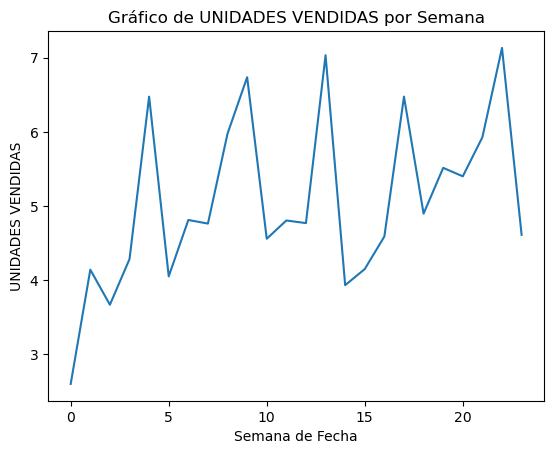

In [86]:
Datos_de_venta_por_semana = Ventas_semanales.groupby('Semana de Fecha')[['CONTRIBUCION','ORDENES DE PEDIDO','UNIDADES VENDIDAS']].sum().reset_index()
Datos_de_venta_por_semana

def graficar(df,medida):
    plt.plot(df[medida])
    plt.xlabel('Semana de Fecha')
    plt.ylabel(medida)  # Añadí la etiqueta del eje y para mayor claridad
    plt.title(f'Gráfico de {medida} por Semana')
    plt.show()
graficar(Datos_de_venta_por_semana,'UNIDADES VENDIDAS')

Procesamiento de archivos

In [71]:
Ventas_Procesadas = Ventas_semanales.merge(Ventas_cerrado,how='left',on=['FECHA ASIGNADO','CODIGO'])
Ventas_Procesadas = Ventas_Procesadas.merge(Clasificacion,how='left',on=['FECHA ASIGNADO','CODIGO'])
Ventas_Procesadas.head()

,CODIGO,FECHA,FECHA ASIGNADO,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3,CATEGORIA,LINEA,CALIFICACION
0,X548,2023-06,2023-07,Semana 23,0.145135,0.120148,0.057143,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
1,X548,2023-06,2023-07,Semana 24,0.277133,0.177449,0.224176,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
2,X548,2023-06,2023-07,Semana 25,0.158138,0.160813,0.072527,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
3,X548,2023-06,2023-07,Semana 26,0.246683,0.223660,0.182418,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
4,X548,2023-06,2023-07,Semana 27,0.246299,0.136784,0.195604,0.43674,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA


In [72]:
Ventas_Procesadas

,CODIGO,FECHA,FECHA ASIGNADO,Semana de Fecha,CONTRIBUCION,ORDENES DE PEDIDO,UNIDADES VENDIDAS,CONTRIBUCION-2,ORDENES DE PEDIDO-2,UNIDADES VENDIDAS-2,CONTRIBUCION-3,ORDENES DE PEDIDO-3,UNIDADES VENDIDAS-3,CATEGORIA,LINEA,CALIFICACION
0,X548,2023-06,2023-07,Semana 23,0.145135,0.120148,0.057143,0.436740,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
1,X548,2023-06,2023-07,Semana 24,0.277133,0.177449,0.224176,0.436740,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
2,X548,2023-06,2023-07,Semana 25,0.158138,0.160813,0.072527,0.436740,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
3,X548,2023-06,2023-07,Semana 26,0.246683,0.223660,0.182418,0.436740,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
4,X548,2023-06,2023-07,Semana 27,0.246299,0.136784,0.195604,0.436740,0.569316,0.397802,0.472167,0.713494,0.457143,C1,S1,ESTRELLA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16658,X8,2023-08,2023-09,Semana 33,0.103384,0.000000,0.004396,0.106800,0.000000,0.004396,0.103511,0.000000,0.004396,C1,S5,INTERROGANTE
16659,X8,2023-08,2023-09,Semana 34,0.103384,0.000000,0.004396,0.106800,0.000000,0.004396,0.103511,0.000000,0.004396,C1,S5,INTERROGANTE
16660,X8,2023-09,2023-10,Semana 39,0.103511,0.000000,0.004396,0.103511,0.000000,0.004396,0.103257,0.000000,0.004396,C1,S5,INTERROGANTE
16661,X8,2023-10,2023-11,Semana 44,0.103511,0.000000,0.004396,0.103257,0.000000,0.004396,0.103511,0.000000,0.004396,C1,S5,INTERROGANTE
